<a href="https://colab.research.google.com/github/Yuyan-C/MAIS202Project/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.ensemble import RandomForestClassifier
#!pip install joblib #??
from joblib import dump


# Data preprocessing
Split the dataset into training, validation, and testing set (64%, 16%, 20%) using train_test_split with shuffling

Use naive oversampling to generate a balanced training set

In [42]:
df = pd.read_csv('covtype.csv')
x = df['Horizontal_Distance_To_Hydrology'].values
y = df['Vertical_Distance_To_Hydrology'].values
distance = np.sqrt(np.square(x)+np.square(y))
df = df.drop(['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], axis=1)
df.insert(3, "Distance_To_Hydrology", distance)
df.head()

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258.000000,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212.084889,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,275.769832,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,269.235956,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153.003268,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [43]:
# set the number of training set, validation set, and testing set
# get the number of features 
num_features = len(df.columns)-1
# set X and y
scaler = MinMaxScaler() 
X = scaler.fit_transform(df.iloc[:, :num_features])
y = df.iloc[:, num_features:].to_numpy().reshape(len(df.index))

In [44]:
# set training, validation, and testing sets
# 64% training, 16% validation, 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle = True)#
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Random Forest


In [45]:
clf = RandomForestClassifier()
print(datetime.now().strftime("%H:%M:%S.%f"))
clf.fit(X_train,y_train)
#from joblib import dump
dump(clf, 'classifier.joblib') 
print("predicting training set...")
print(datetime.now().strftime("%H:%M:%S.%f"))
y_train_pred = clf.predict(X_train)
print("predicting validation set...")
print(datetime.now().strftime("%H:%M:%S.%f"))
y_valid_pred = clf.predict(X_valid)
print("predicting testing set...")
print(datetime.now().strftime("%H:%M:%S.%f"))
y_test_pred = clf.predict(X_test)
print("training accuracy: {}".format(accuracy_score(y_train, y_train_pred)))
print("validation accuracy: {}".format(accuracy_score(y_valid,y_valid_pred)))
print("testing accuracy: {}".format(accuracy_score(y_test,y_test_pred)))
print("training accuracy (balanced): {}".format(balanced_accuracy_score(y_train, y_train_pred)))
print("validation accuracy (balanced): {}".format(balanced_accuracy_score(y_valid, y_valid_pred)))
print("testing accuracy (balanced): {}".format(balanced_accuracy_score(y_test, y_test_pred)))

08:16:55.255289
predicting training set...
08:22:33.109132
predicting validation set...
08:23:10.728299
predicting testing set...
08:23:14.545430
training accuracy: 1.0
validation accuracy: 0.9486134119317571
testing accuracy: 0.9492095729025929
training accuracy (balanced): 1.0
validation accuracy (balanced): 0.9142375031988156
testing accuracy (balanced): 0.9116677790584278


confusion matrix for training set:
 [[181445      0      0      0      0      0      0]
 [     0 181445      0      0      0      0      0]
 [     0      0 181445      0      0      0      0]
 [     0      0      0 181445      0      0      0]
 [     0      0      0      0 181445      0      0]
 [     0      0      0      0      0 181445      0]
 [     0      0      0      0      0      0 181445]]


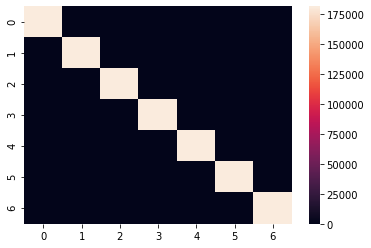

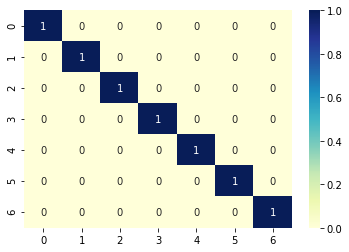

In [49]:
#Confusion matrix whose i-th row and j-th column entry 
#indicates the number of samples with true label 
#being i-th class and predicted label being j-th class.
cf_matrix_train = confusion_matrix(y_train_pred, y_train)
print("confusion matrix for training set:\n {}".format(cf_matrix_train))
sns.heatmap(cf_matrix_train, annot=False)
plt.show()
sum = np.sum(cf_matrix_train,axis=1)
cf_matrix_train = cf_matrix_train / sum[:,None]
sns.heatmap(cf_matrix_train, annot=True,cmap="YlGnBu")
plt.show()

confusion matrix for validation set:
 [[31687  1329     2     0    16     1   128]
 [ 1959 43656    66     0   217    72    20]
 [    3   143  5539    51    22   215     0]
 [    0     0    25   401     0    11     0]
 [   11   120     5     0  1239     1     0]
 [    6    86   135    11     7  2468     0]
 [   93    22     0     0     0     0  3195]]


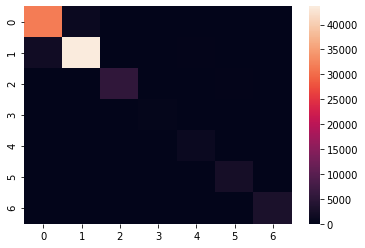

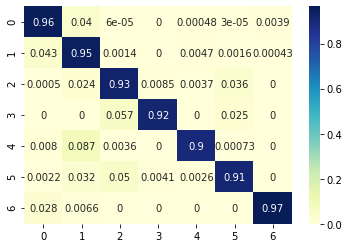

In [50]:
cf_matrix_valid = confusion_matrix(y_valid_pred, y_valid)
print("confusion matrix for validation set:\n {}".format(cf_matrix_valid))
sns.heatmap(cf_matrix_valid, annot=False)
plt.show()
sum = np.sum(cf_matrix_valid,axis=1)
cf_matrix_valid = cf_matrix_valid / sum[:,None]
sns.heatmap(cf_matrix_valid, annot=True,cmap="YlGnBu")
plt.show()

confusion matrix for testing set:
 [[39953  1650     3     0    16     2   127]
 [ 2444 54385    67     0   290    71    23]
 [    2   170  6875    71    20   261     0]
 [    0     1    25   433     0    20     0]
 [   16   158     8     0  1659     3     1]
 [    5   117   143    22    10  3132     0]
 [  137    19     0     0     0     0  3864]]


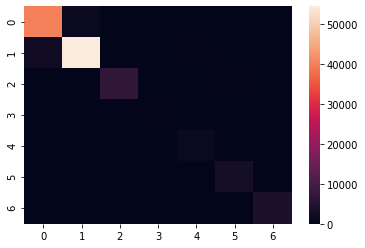

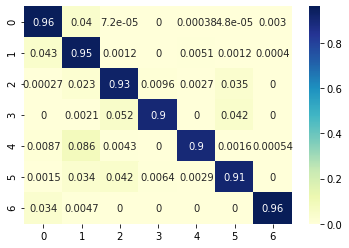

In [51]:
cf_matrix_test = confusion_matrix(y_test_pred, y_test)
print("confusion matrix for testing set:\n {}".format(cf_matrix_test))
sns.heatmap(cf_matrix_test, annot=False)
plt.show()
sum = np.sum(cf_matrix_test,axis=1)
cf_matrix_test = cf_matrix_test / sum[:,None]
sns.heatmap(cf_matrix_test, annot=True,cmap="YlGnBu")
plt.show()

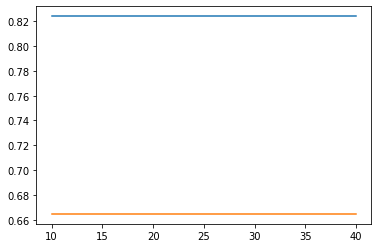

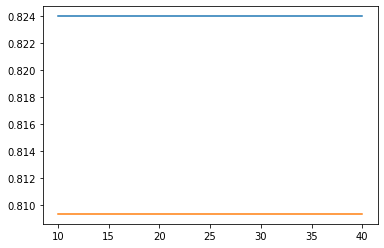

In [ ]:
max_depths = [10,20,30,40]
training_accuracy = []
validation_accuracy = []
training_accuracy_balanced, validation_accuracy_balanced = [], []
for i in max_depths:
  clf = RandomForestClassifier(max_depth= 10, random_state=42)
  clf.fit(X_train, y_train)
  clf.fit(X_train,y_train)
  y_train_pred = clf.predict(X_train)
  y_valid_pred = clf.predict(X_valid)
  training_accuracy.append(accuracy_score(y_train, y_train_pred))
  validation_accuracy.append(accuracy_score(y_valid,y_valid_pred))
  training_accuracy_balanced.append(balanced_accuracy_score(y_train, y_train_pred))
  validation_accuracy_balanced.append(balanced_accuracy_score(y_valid, y_valid_pred))

plt.plot(max_depths,training_accuracy)
plt.plot(max_depths, validation_accuracy)
plt.show()

plt.plot(max_depths,training_accuracy_balanced)
plt.plot(max_depths, validation_accuracy_balanced)
plt.show()

  